In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [94]:
df = pd.read_csv('tabla_principal_etl.csv')

print("DATASET CARGADO")
print("-"*60)
print(f"Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
print(f"Memoria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nColumnas:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2d}. {col}")

DATASET CARGADO
------------------------------------------------------------
Dimensiones: 110,197 filas × 12 columnas
Memoria: 67.97 MB

Columnas:
    1. order_number
    2. order_id
    3. product_id
    4. price
    5. product_category_name
    6. order_purchase_datetime
    7. orders_status
    8. orders_customer_id
    9. customer_unique_id
   10. customer_state
   11. review_score
   12. payment_type


In [95]:
df.head()

,order_number,order_id,product_id,price,product_category_name,order_purchase_datetime,orders_status,orders_customer_id,customer_unique_id,customer_state,review_score,payment_type
0,26662,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,29.99,utilidades_domesticas,02-10-2017,delivered,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,Sao Paulo,4.0,voucher
1,88456,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,118.70,perfumaria,24-07-2018,delivered,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,Bahia,4.0,boleto
2,92361,47770eb9100c2d0c44946d9cf07ec65d,aa4383b373c6aca5d8797843e5594415,159.90,automotivo,08-08-2018,delivered,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,Goias,5.0,credit_card
3,33657,949d5b44dbf5de918fe9c16f97b45f8a,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,pet_shop,18-11-2017,delivered,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,Rio Grande do Norte,5.0,credit_card
4,53505,ad21c59c0840e6cb83a9ceb5573f8159,65266b2da20d04dbe00c5c2d3bb7859e,19.90,papelaria,13-02-2018,delivered,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,Sao Paulo,5.0,credit_card


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110197 entries, 0 to 110196
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_number             110197 non-null  int64  
 1   order_id                 110197 non-null  object 
 2   product_id               110197 non-null  object 
 3   price                    110197 non-null  float64
 4   product_category_name    108660 non-null  object 
 5   order_purchase_datetime  110197 non-null  object 
 6   orders_status            110197 non-null  object 
 7   orders_customer_id       110197 non-null  object 
 8   customer_unique_id       110197 non-null  object 
 9   customer_state           110197 non-null  object 
 10  review_score             109370 non-null  float64
 11  payment_type             110194 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 10.1+ MB


In [97]:
print("ANÁLISIS DE VALORES NULOS")
print("-"*60)

nulos = df.isnull().sum()
nulos_pct = (df.isnull().sum() / len(df) * 100).round(2)

nulos_df = pd.DataFrame({
    'Columna': nulos.index,
    'Nulos': nulos.values,
    'Porcentaje': nulos_pct.values
}).sort_values('Nulos', ascending=False)

print("\nColumnas con valores nulos:")
print(nulos_df[nulos_df['Nulos'] > 0].to_string(index=False))

print(f"\nTotal de valores nulos: {df.isnull().sum().sum():,}")

ANÁLISIS DE VALORES NULOS
------------------------------------------------------------

Columnas con valores nulos:
              Columna  Nulos  Porcentaje
product_category_name   1537        1.39
         review_score    827        0.75
         payment_type      3        0.00

Total de valores nulos: 2,367


In [98]:
print("\nTRATANDO NULOS EN product_category_name")
print("-"*60)

nulos_antes = df['product_category_name'].isnull().sum()
print(f"Nulos antes: {nulos_antes:,}")

df['product_category_name'] = df['product_category_name'].fillna('Otros')

nulos_despues = df['product_category_name'].isnull().sum()
print(f"Nulos después: {nulos_despues}")
print("Valores nulos reemplazados por 'Otros'")


TRATANDO NULOS EN product_category_name
------------------------------------------------------------
Nulos antes: 1,537
Nulos después: 0
Valores nulos reemplazados por 'Otros'


In [99]:
print("\nTRATANDO NULOS EN payment_type")
print("-"*60)

nulos_antes = df['payment_type'].isnull().sum()
print(f"Nulos antes: {nulos_antes:,}")

df['payment_type'] = df['payment_type'].dropna()

nulos_despues = df['payment_type'].isnull().sum()
print(f"Nulos después: {nulos_despues}")
print("Valores nulos desechados por tratarse únicamente de 3 registros")


TRATANDO NULOS EN payment_type
------------------------------------------------------------
Nulos antes: 3
Nulos después: 3
Valores nulos desechados por tratarse únicamente de 3 registros


In [100]:
print("\nTRATANDO NULOS EN review_score")
print("-"*60)

nulos_antes = df['review_score'].isnull().sum()
print(f"Nulos antes: {nulos_antes:,}")
print(f"Representan el {nulos_antes/len(df)*100:.2f}% del dataset")

print(f"\nEstadísticas de review_score (sin nulos):")
print(f"   Media: {df['review_score'].mean():.2f}")
print(f"   Mediana: {df['review_score'].median():.2f}")
print(f"   Moda: {df['review_score'].mode()[0]:.0f}")

mediana_review = df['review_score'].median()
df['review_score'] = df['review_score'].fillna(mediana_review)

nulos_despues = df['review_score'].isnull().sum()
print(f"\nNulos después: {nulos_despues}")
print(f"Valores nulos reemplazados por la mediana ({mediana_review:.0f})")


TRATANDO NULOS EN review_score
------------------------------------------------------------
Nulos antes: 827
Representan el 0.75% del dataset

Estadísticas de review_score (sin nulos):
   Media: 4.08
   Mediana: 5.00
   Moda: 5

Nulos después: 0
Valores nulos reemplazados por la mediana (5)


In [101]:
print("\nVERIFICACIÓN FINAL")
print("="*60)

nulos_total = df.isnull().sum().sum()
print(f"Total de valores nulos restantes: {nulos_total}")

if nulos_total == 0:
    print("\n¡Dataset completamente limpio de valores nulos!")
else:
    print("\nAún hay valores nulos:")
    print(df.isnull().sum()[df.isnull().sum() > 0])


VERIFICACIÓN FINAL
Total de valores nulos restantes: 3

Aún hay valores nulos:
payment_type    3
dtype: int64


In [102]:
print("CREANDO VARIABLE DE REGIÓN GEOGRÁFICA")
print("-"*60)

estados_sigla = {
    'Acre': 'AC', 'Alagoas': 'AL', 'Amapa': 'AP', 'Amazonas': 'AM',
    'Bahia': 'BA', 'Ceara': 'CE', 'Distrito Federal': 'DF',
    'Espirito Santo': 'ES', 'Goias': 'GO', 'Maranhao': 'MA',
    'Mato Grosso': 'MT', 'Mato Grosso do Sul': 'MS', 'Minas Gerais': 'MG',
    'Para': 'PA', 'Paraiba': 'PB', 'Parana': 'PR', 'Pernambuco': 'PE',
    'Piaui': 'PI', 'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN',
    'Rio Grande do Sul': 'RS', 'Rondonia': 'RO', 'Roraima': 'RR',
    'Santa Catarina': 'SC', 'Sao Paulo': 'SP', 'Sergipe': 'SE', 'Tocantins': 'TO'
}

regiones_brasil = {
    # Norte
    'Acre': 'Norte', 'Amazonas': 'Norte', 'Amapa': 'Norte', 'Para': 'Norte',
    'Rondonia': 'Norte', 'Roraima': 'Norte', 'Tocantins': 'Norte',
    # Nordeste
    'Alagoas': 'Nordeste', 'Bahia': 'Nordeste', 'Ceara': 'Nordeste', 'Maranhao': 'Nordeste',
    'Paraiba': 'Nordeste', 'Pernambuco': 'Nordeste', 'Piaui': 'Nordeste', 
    'Rio Grande do Norte': 'Nordeste', 'Sergipe': 'Nordeste',
    # Centro-Oeste
    'Distrito Federal': 'Centro-Oeste', 'Goias': 'Centro-Oeste', 
    'Mato Grosso do Sul': 'Centro-Oeste', 'Mato Grosso': 'Centro-Oeste',
    # Sudeste
    'Espirito Santo': 'Sudeste', 'Minas Gerais': 'Sudeste', 
    'Rio de Janeiro': 'Sudeste', 'Sao Paulo': 'Sudeste',
    # Sul
    'Parana': 'Sul', 'Rio Grande do Sul': 'Sul', 'Santa Catarina': 'Sul'
}

df['customer_region'] = df['customer_state'].map(regiones_brasil)

print("Variable creada: customer_region")
print(f"\nDistribución por región:")
print(df['customer_region'].value_counts())
print(f"\nPorcentaje por región:")
print((df['customer_region'].value_counts(normalize=True) * 100).round(2))

CREANDO VARIABLE DE REGIÓN GEOGRÁFICA
------------------------------------------------------------
Variable creada: customer_region

Distribución por región:
customer_region
Sudeste         75732
Sul             15880
Nordeste        10087
Centro-Oeste     6480
Norte            2018
Name: count, dtype: int64

Porcentaje por región:
customer_region
Sudeste         68.72
Sul             14.41
Nordeste         9.15
Centro-Oeste     5.88
Norte            1.83
Name: proportion, dtype: float64


In [103]:
nulos_region = df['customer_region'].isnull().sum()
if nulos_region > 0:
    print(f"Estados no mapeados: {nulos_region}")
    print(df[df['customer_region'].isnull()]['customer_state'].unique())
else:
    print("Todos los estados fueron mapeados correctamente")

Todos los estados fueron mapeados correctamente


In [104]:
print("RESUMEN ESTADÍSTICO")
print("-"*60)
print(f"\nVariables numéricas:")
df.describe()

RESUMEN ESTADÍSTICO
------------------------------------------------------------

Variables numéricas:


,order_number,price,review_score
count,110197.000000,110197.000000,110197.000000
mean,48255.140566,119.980563,4.089322
std,27792.810838,182.299446,1.344185
min,1.000000,0.850000,1.000000
25%,24277.000000,39.900000,4.000000
50%,48307.000000,74.900000,5.000000
75%,72320.000000,134.170000,5.000000
max,96478.000000,6735.000000,5.000000



ANÁLISIS DE PRECIOS
------------------------------------------------------------


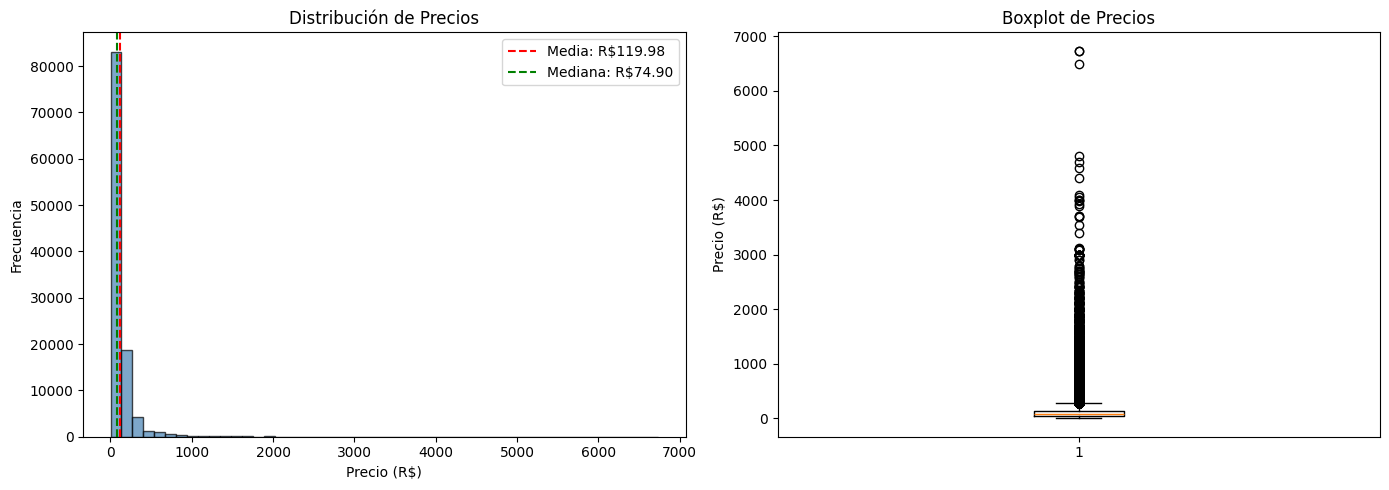


Estadísticas de precio:
   Mínimo: R$ 0.85
   Máximo: R$ 6735.00
   Media: R$ 119.98
   Mediana: R$ 74.90
   Desv. Estándar: R$ 182.30


In [105]:
print("\nANÁLISIS DE PRECIOS")
print("-"*60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['price'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Precio (R$)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Precios')
axes[0].axvline(df['price'].mean(), color='red', linestyle='--', label=f'Media: R${df["price"].mean():.2f}')
axes[0].axvline(df['price'].median(), color='green', linestyle='--', label=f'Mediana: R${df["price"].median():.2f}')
axes[0].legend()

axes[1].boxplot(df['price'], vert=True)
axes[1].set_ylabel('Precio (R$)')
axes[1].set_title('Boxplot de Precios')

plt.tight_layout()
plt.show()

print(f"\nEstadísticas de precio:")
print(f"   Mínimo: R$ {df['price'].min():.2f}")
print(f"   Máximo: R$ {df['price'].max():.2f}")
print(f"   Media: R$ {df['price'].mean():.2f}")
print(f"   Mediana: R$ {df['price'].median():.2f}")
print(f"   Desv. Estándar: R$ {df['price'].std():.2f}")


ANÁLISIS DE REVIEW SCORES
------------------------------------------------------------


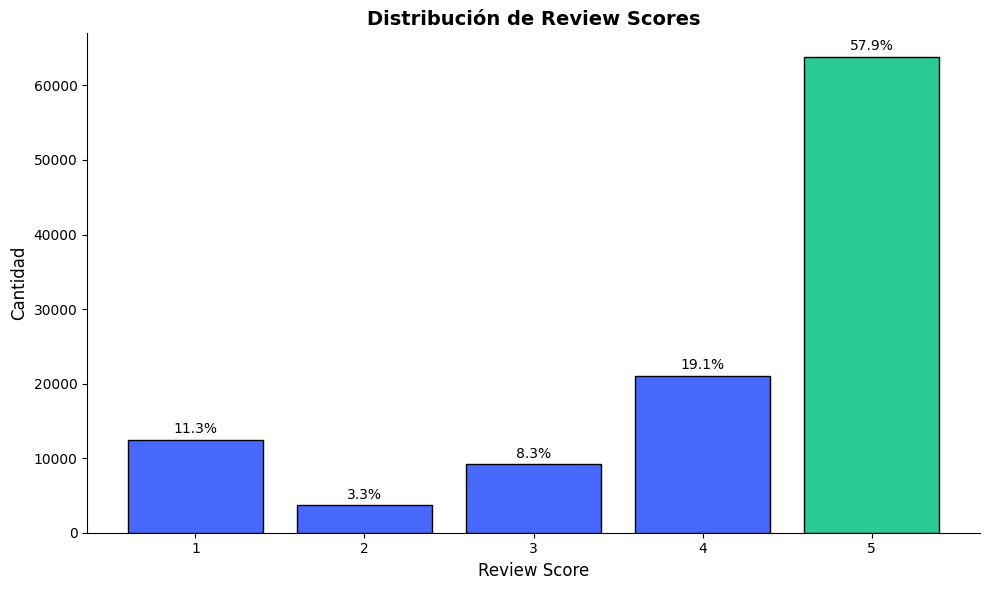


Estadísticas de review_score:
   Promedio: 4.09
   Mediana: 5
   Moda: 5

77.0% de las reviews son positivas (≥4)


In [106]:
print("\nANÁLISIS DE REVIEW SCORES")
print("-"*60)


# 1. Preparación de datos
review_counts = df['review_score'].value_counts().sort_index()
max_score = review_counts.idxmax() # Identifica el score con mayor cantidad

# 2. Definición de colores dinámicos
# Turquesa #2bcb94 para el valor máximo, azul #4868fc para los demás
colors = ['#2bcb94' if score == max_score else '#4868fc' for score in review_counts.index]

# 3. Creación del gráfico
plt.figure(figsize=(10, 6))
bars = plt.bar(review_counts.index, review_counts.values, color=colors, edgecolor='black')

# 4. Estética y etiquetas
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.title('Distribución de Review Scores', fontsize=14, fontweight='bold')
plt.xticks([1, 2, 3, 4, 5])

# Añadir etiquetas de porcentaje sobre las barras
total = len(df)
for bar in bars:
    height = bar.get_height()
    pct = (height / total) * 100
    plt.text(bar.get_x() + bar.get_width()/2., height + 500,
             f'{pct:.1f}%', ha='center', va='bottom', fontsize=10)

# Limpiar bordes innecesarios
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# 5. Impresión de estadísticas
print(f"\nEstadísticas de review_score:")
print(f"   Promedio: {df['review_score'].mean():.2f}")
print(f"   Mediana: {df['review_score'].median():.0f}")
print(f"   Moda: {df['review_score'].mode()[0]:.0f}")
print(f"\n{(df['review_score'] >= 4).sum()/len(df)*100:.1f}% de las reviews son positivas (≥4)")


ANÁLISIS DE CATEGORÍAS DE PRODUCTOS
------------------------------------------------------------


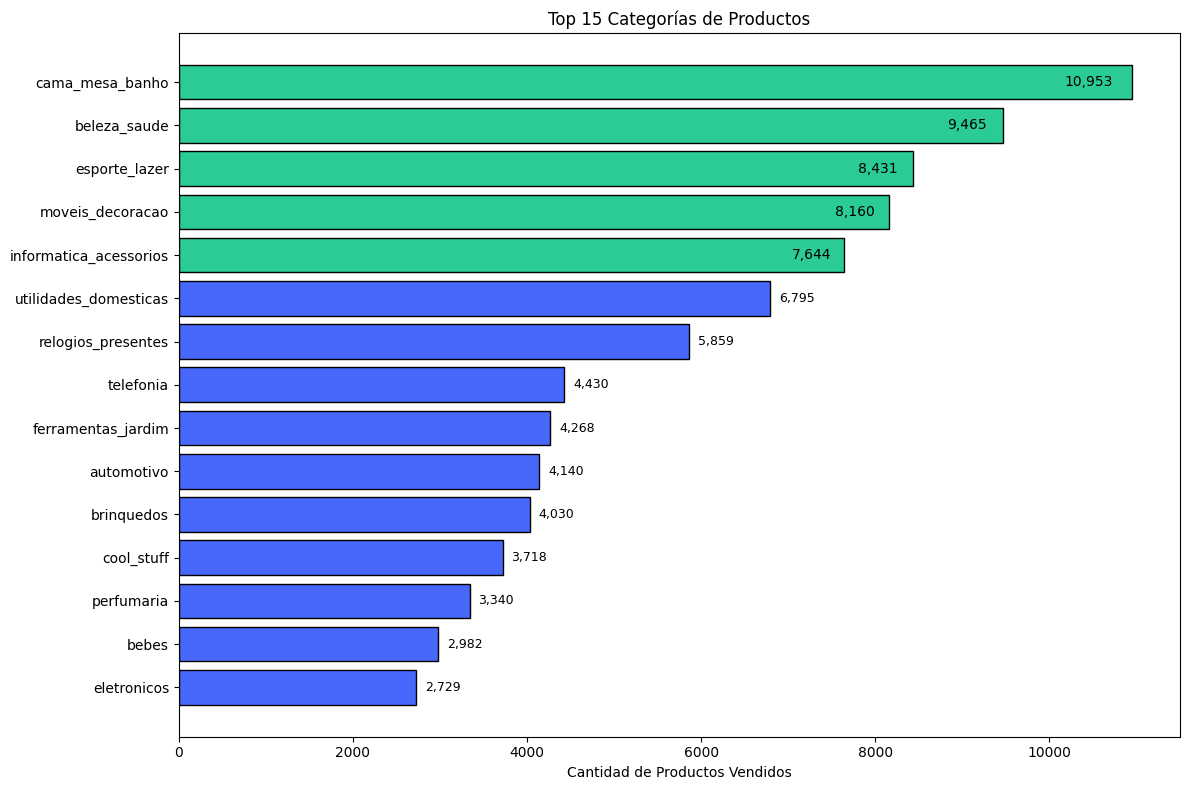


Total de categorías: 74

Top 5 categorías:
   1. cama_mesa_banho: 10,953 (9.9%)
   2. beleza_saude: 9,465 (8.6%)
   3. esporte_lazer: 8,431 (7.7%)
   4. moveis_decoracao: 8,160 (7.4%)
   5. informatica_acessorios: 7,644 (6.9%)


In [107]:
print("\nANÁLISIS DE CATEGORÍAS DE PRODUCTOS")
print("-"*60)


# 1. Preparar datos
top_categorias = df['product_category_name'].value_counts().head(15)
categorias = top_categorias.index[::-1]
valores = top_categorias.values[::-1]

# Identificar las 5 categorías con más ventas (Top 5)
top_5_nombres = top_categorias.head(5).index.tolist()

# 2. Definir colores: Turquesa para el Top 5, Azul para el resto
color_turquesa = '#2bcb94'
color_azul = '#4868fc'
colores = [color_turquesa if cat in top_5_nombres else color_azul for cat in categorias]

# 3. Graficar
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(categorias, valores, color=colores, edgecolor='black')

ax.set_xlabel('Cantidad de Productos Vendidos')
ax.set_title('Top 15 Categorías de Productos')

# 4. Etiquetas dinámicas (Top 5 adentro en negro, el resto afuera en negro)
for bar, value, cat in zip(bars, valores, categorias):
    label_text = f'{value:,}'
    
    if cat in top_5_nombres:
        # Texto DENTRO de la barra (para las turquesas)
        ax.text(value * 0.98, bar.get_y() + bar.get_height()/2, 
                label_text, va='center', ha='right', 
                fontsize=10, color='black')
    else:
        # Texto FUERA de la barra (para las azules)
        ax.text(value + 100, bar.get_y() + bar.get_height()/2, 
                label_text, va='center', ha='left', 
                fontsize=9, color='black')

plt.tight_layout()
plt.show()

print(f"\nTotal de categorías: {df['product_category_name'].nunique()}")
print(f"\nTop 5 categorías:")
for i, (cat, count) in enumerate(top_categorias.head(5).items(), 1):
    pct = count / len(df) * 100
    print(f"   {i}. {cat}: {count:,} ({pct:.1f}%)")


ANÁLISIS DE MÉTODOS DE PAGO
------------------------------------------------------------


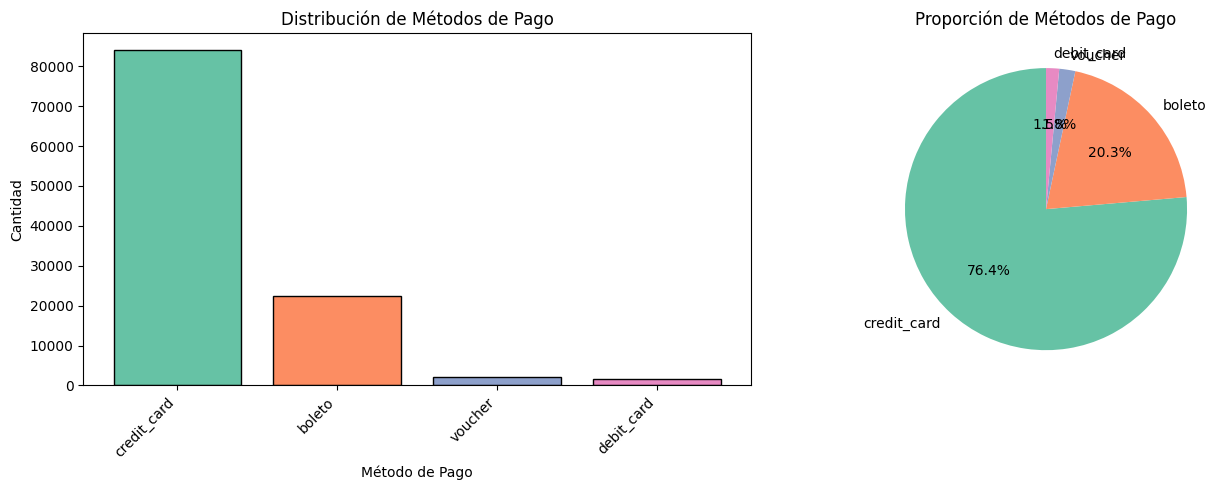


Distribución de métodos de pago:
   credit_card: 84,154 (76.4%)
   boleto: 22,362 (20.3%)
   voucher: 2,026 (1.8%)
   debit_card: 1,652 (1.5%)


In [108]:
print("\nANÁLISIS DE MÉTODOS DE PAGO")
print("-"*60)

payment_counts = df['payment_type'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

colors_payment = sns.color_palette('Set2', len(payment_counts))
axes[0].bar(payment_counts.index, payment_counts.values, color=colors_payment, edgecolor='black')
axes[0].set_xlabel('Método de Pago')
axes[0].set_ylabel('Cantidad')
axes[0].set_title('Distribución de Métodos de Pago')
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45, ha='right')

axes[1].pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%', 
            colors=colors_payment, startangle=90)
axes[1].set_title('Proporción de Métodos de Pago')

plt.tight_layout()
plt.show()

print(f"\nDistribución de métodos de pago:")
for payment, count in payment_counts.items():
    pct = count / len(df) * 100
    print(f"   {payment}: {count:,} ({pct:.1f}%)")


⭐📦 REVIEW SCORE POR CATEGORÍA


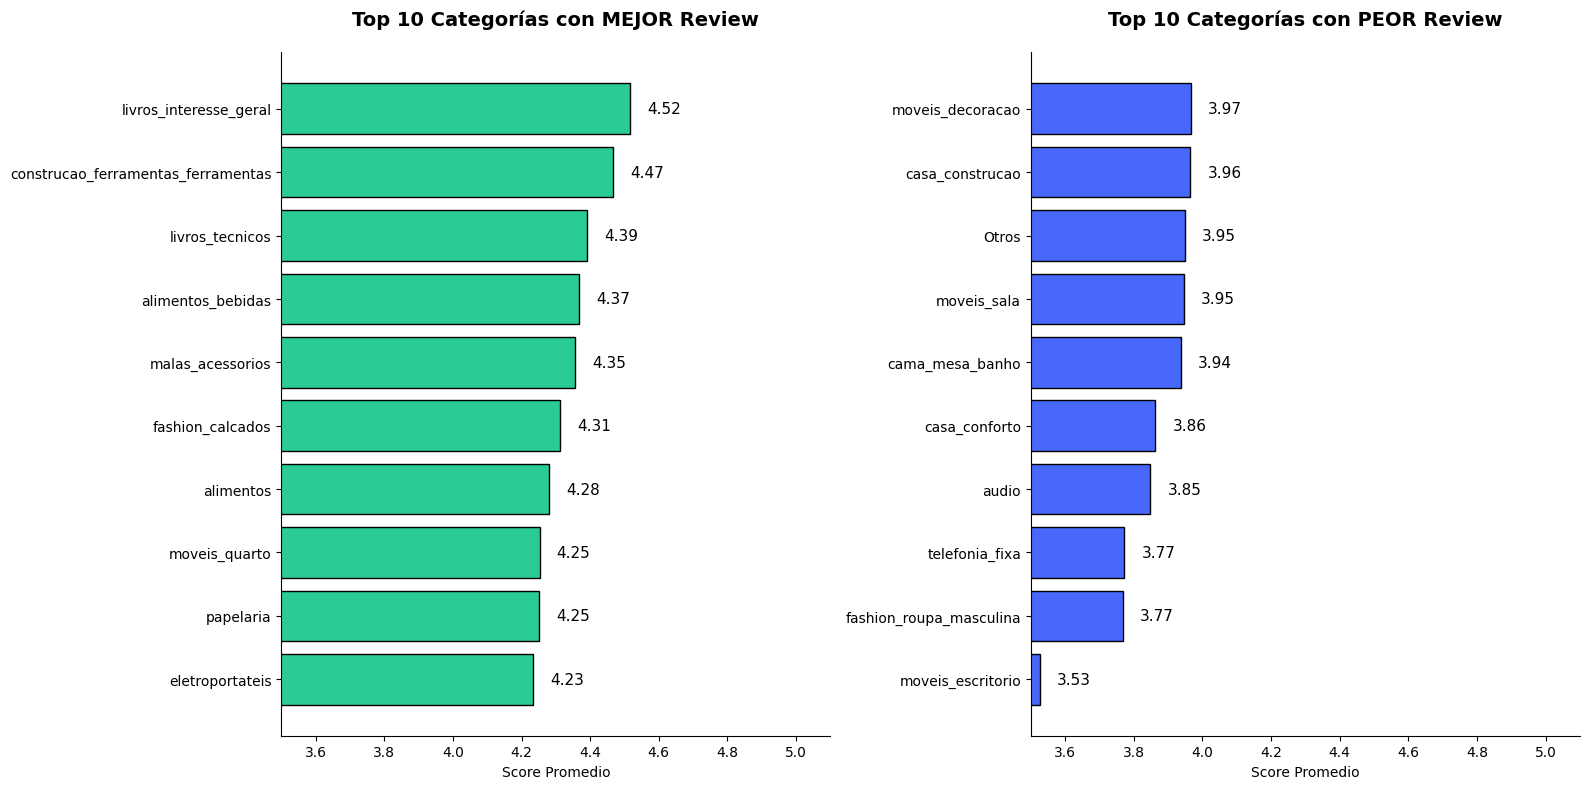


💡 Mejor categoría: livros_interesse_geral (4.52)
💡 Peor categoría: moveis_escritorio (3.53)


In [109]:
print("\n⭐📦 REVIEW SCORE POR CATEGORÍA")
print("="*60)
# 1. Procesamiento de datos
review_por_categoria = df.groupby('product_category_name')['review_score'].agg(['mean', 'count'])
review_por_categoria.columns = ['review_promedio', 'cantidad']
review_por_categoria = review_por_categoria[review_por_categoria['cantidad'] >= 100]
review_por_categoria = review_por_categoria.sort_values('review_promedio', ascending=False)

# 2. Configuración del gráfico
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# --- GRÁFICO IZQUIERDO: TOP MEJORES (#2bcb94) ---
top10_mejor = review_por_categoria.head(10).sort_values('review_promedio', ascending=True)
bars_mejor = axes[0].barh(top10_mejor.index, top10_mejor['review_promedio'], color='#2bcb94', edgecolor='black')
axes[0].set_title('Top 10 Categorías con MEJOR Review', fontsize=14, fontweight='bold', pad=20)
axes[0].set_xlim(3.5, 5.1) # Un poco más de margen para el texto

# --- GRÁFICO DERECHO: TOP PEORES (#4868fc) ---
top10_peor = review_por_categoria.tail(10).sort_values('review_promedio', ascending=True)
bars_peor = axes[1].barh(top10_peor.index, top10_peor['review_promedio'], color='#4868fc', edgecolor='black')
axes[1].set_title('Top 10 Categorías con PEOR Review', fontsize=14, fontweight='bold', pad=20)
axes[1].set_xlim(3.5, 5.1)

# 3. Función para añadir las etiquetas de valor
def agregar_etiquetas(ax, bars):
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.05,           # Posición X (ligeramente desplazado a la derecha)
                bar.get_y() + bar.get_height()/2, # Posición Y (centrado en la barra)
                f'{width:.2f}',        # Texto del valor
                va='center',           # Alineación vertical
                ha='left',             # Alineación horizontal
                fontsize=11,           # Tamaño de letra
                color='black')         # Color solicitado

agregar_etiquetas(axes[0], bars_mejor)
agregar_etiquetas(axes[1], bars_peor)

# Estética final
for ax in axes:
    ax.set_xlabel('Score Promedio')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# 4. Insights
print(f"\n💡 Mejor categoría: {review_por_categoria.index[0]} ({review_por_categoria['review_promedio'].iloc[0]:.2f})")
print(f"💡 Peor categoría: {review_por_categoria.index[-1]} ({review_por_categoria['review_promedio'].iloc[-1]:.2f})")


PRECIO PROMEDIO POR CATEGORÍA
------------------------------------------------------------


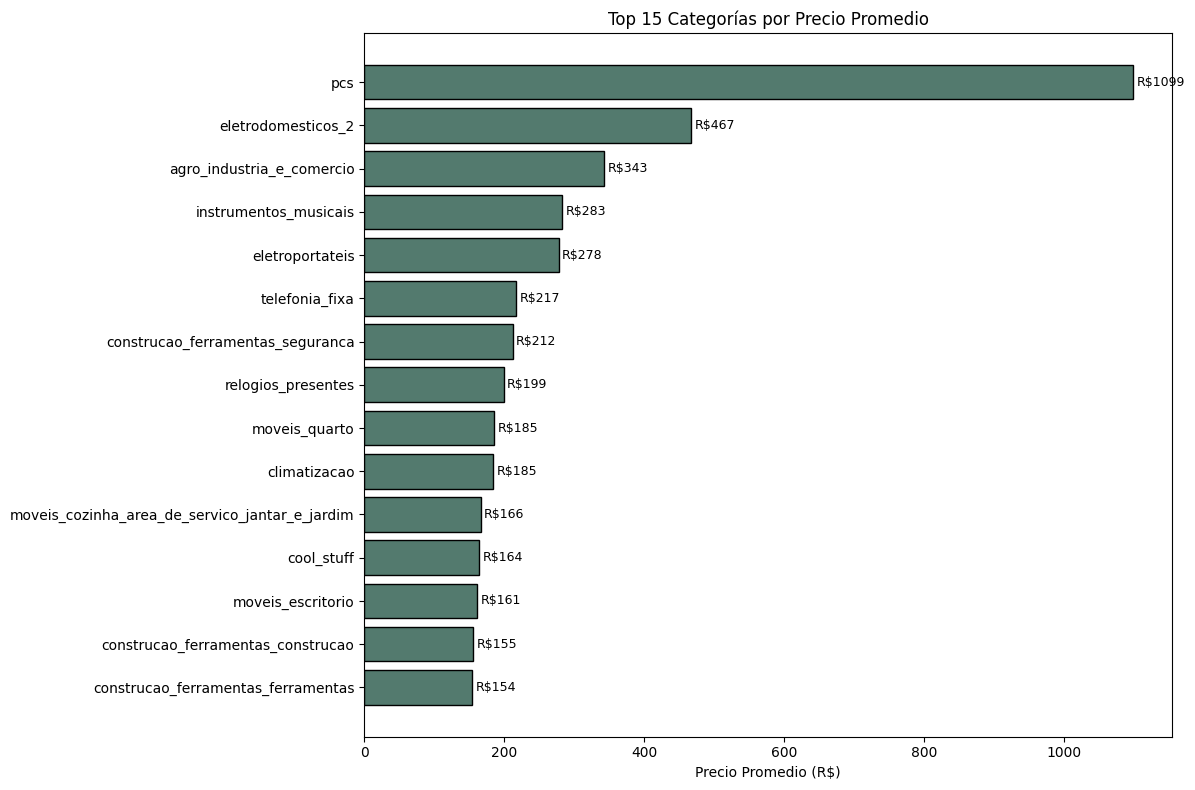

In [110]:
print("\nPRECIO PROMEDIO POR CATEGORÍA")
print("-"*60)

precio_por_categoria = df.groupby('product_category_name')['price'].agg(['mean', 'count'])
precio_por_categoria.columns = ['precio_promedio', 'cantidad']
precio_por_categoria = precio_por_categoria[precio_por_categoria['cantidad'] >= 100]
precio_por_categoria = precio_por_categoria.sort_values('precio_promedio', ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))
top15_precio = precio_por_categoria.head(15)
bars = ax.barh(top15_precio.index[::-1], top15_precio['precio_promedio'].values[::-1], 
               color='#537A6E', edgecolor='black')
ax.set_xlabel('Precio Promedio (R$)')
ax.set_title('Top 15 Categorías por Precio Promedio')

for bar, value in zip(bars, top15_precio['precio_promedio'].values[::-1]):
    ax.text(value + 5, bar.get_y() + bar.get_height()/2, f'R${value:.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()


 REVIEW SCORE POR MÉTODO DE PAGO
------------------------------------------------------------


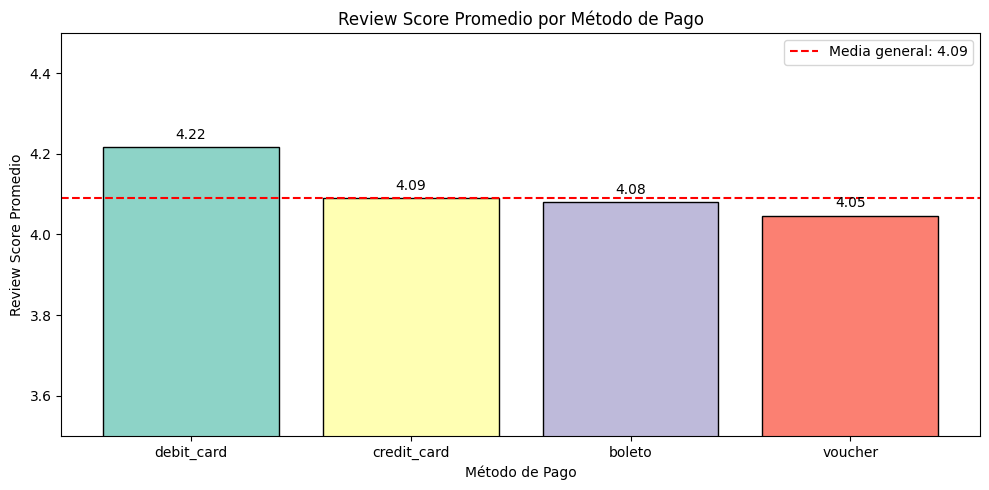

In [111]:
print("\n REVIEW SCORE POR MÉTODO DE PAGO")
print("-"*60)

review_por_pago = df.groupby('payment_type')['review_score'].agg(['mean', 'count'])
review_por_pago.columns = ['review_promedio', 'cantidad']
review_por_pago = review_por_pago.sort_values('review_promedio', ascending=False)

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(review_por_pago.index, review_por_pago['review_promedio'], 
              color=sns.color_palette('Set3', len(review_por_pago)), edgecolor='black')
ax.set_xlabel('Método de Pago')
ax.set_ylabel('Review Score Promedio')
ax.set_title('Review Score Promedio por Método de Pago')
ax.set_ylim(3.5, 4.5)
ax.axhline(df['review_score'].mean(), color='red', linestyle='--', label=f'Media general: {df["review_score"].mean():.2f}')
ax.legend()

for bar, value in zip(bars, review_por_pago['review_promedio']):
    ax.text(bar.get_x() + bar.get_width()/2, value + 0.02, f'{value:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [112]:
print("\n📅 ANÁLISIS TEMPORAL")
print("="*60)

df['order_date'] = pd.to_datetime(df['order_purchase_datetime'], format='%d-%m-%Y')
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['day_of_week'] = df['order_date'].dt.dayofweek
df['day_name'] = df['order_date'].dt.day_name()

print("✅ Variables temporales creadas")
print(f"   Período: {df['order_date'].min().strftime('%Y-%m-%d')} a {df['order_date'].max().strftime('%Y-%m-%d')}")


📅 ANÁLISIS TEMPORAL
✅ Variables temporales creadas
   Período: 2016-09-15 a 2018-08-29


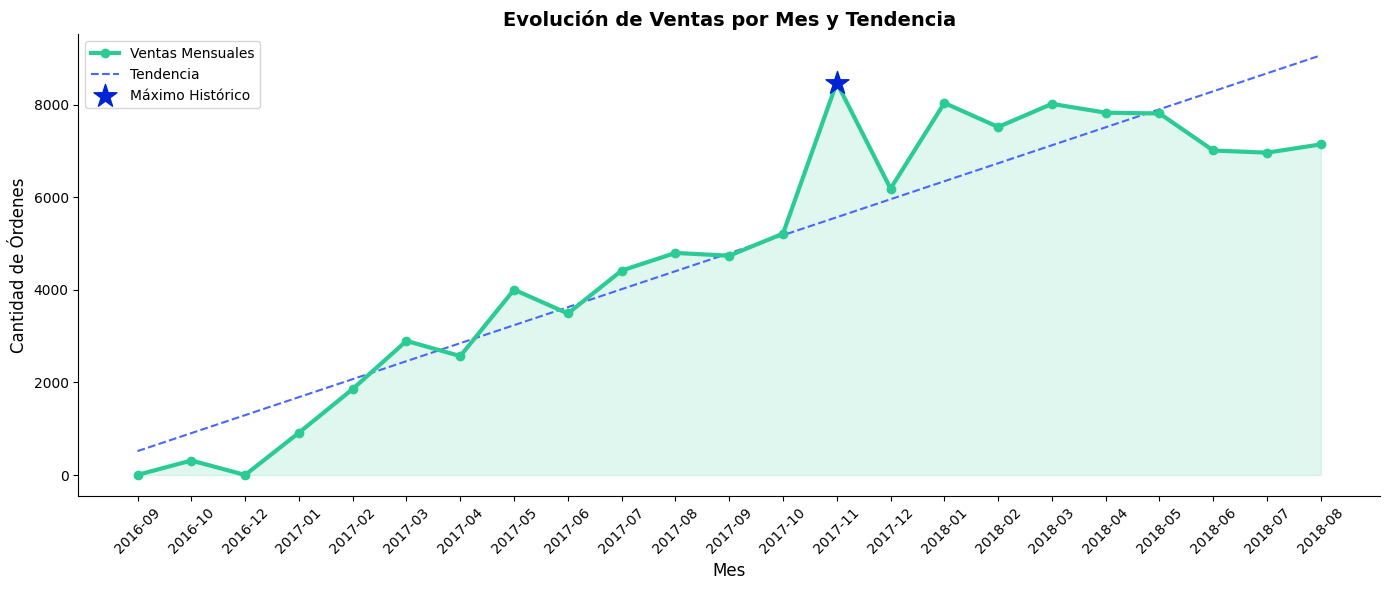


📊 Mes con más ventas: 2017-11 (8,475 órdenes)
📊 Mes con menos ventas: 2016-12 (1 órdenes)


In [113]:
# 1. Preparación de datos
ventas_mes = df.groupby(df['order_date'].dt.to_period('M')).size()
x_indices = np.arange(len(ventas_mes))
y_valores = ventas_mes.values

# 2. Cálculo de la línea de tendencia (regresión lineal simple)
z = np.polyfit(x_indices, y_valores, 1)
p = np.poly1d(z)

# 3. Creación del gráfico
fig, ax = plt.subplots(figsize=(14, 6))

# Línea principal de ventas (Turquesa)
ax.plot(x_indices, y_valores, marker='o', color='#2bcb94', linewidth=3, label='Ventas Mensuales', zorder=3)

# Relleno bajo la curva
ax.fill_between(x_indices, y_valores, alpha=0.15, color='#2bcb94')

# Línea de tendencia (Azul punteada)
ax.plot(x_indices, p(x_indices), color='#4868fc', linestyle='--', linewidth=1.5, label='Tendencia', zorder=2)

# Estrella en el punto más alto
idx_max = np.argmax(y_valores)
ax.scatter(idx_max, y_valores[idx_max], color='#0024d4', marker='*', s=300, label='Máximo Histórico', zorder=4)

# 4. Estética y etiquetas
ax.set_xlabel('Mes', fontsize=12)
ax.set_ylabel('Cantidad de Órdenes', fontsize=12)
ax.set_title('Evolución de Ventas por Mes y Tendencia', fontsize=14, fontweight='bold')

# Ajustar los nombres de los meses en el eje X
ax.set_xticks(x_indices)
ax.set_xticklabels([str(p) for p in ventas_mes.index], rotation=45)

# Limpiar bordes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend()
plt.tight_layout()
plt.show()

# 5. Estadísticas
print(f"\n📊 Mes con más ventas: {ventas_mes.idxmax()} ({ventas_mes.max():,} órdenes)")
print(f"📊 Mes con menos ventas: {ventas_mes.idxmin()} ({ventas_mes.min():,} órdenes)")

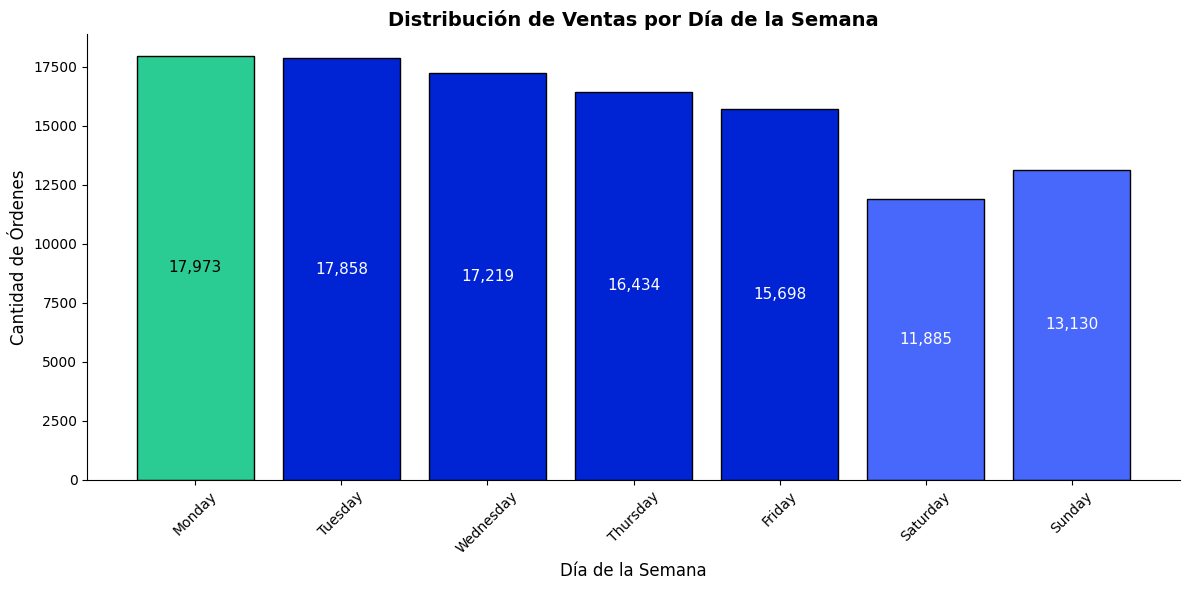


💡 Día con más ventas: Monday (17,973)
💡 Día con menos ventas: Saturday (11,885)


In [114]:
# 1. Preparación de datos
dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ventas_dia = df['day_name'].value_counts().reindex(dias_orden)

# 2. Definición de lógica de colores
# Identificar valor máximo y los dos mínimos
max_val = ventas_dia.max()
dos_minimos = ventas_dia.nsmallest(2).values

colors = []
for val in ventas_dia.values:
    if val == max_val:
        colors.append('#2bcb94') # Turquesa (Máximo)
    elif val in dos_minimos:
        colors.append('#4868fc') # Azul claro (Mínimos)
    else:
        colors.append('#0024d4') # Azul oscuro (Otros)

# 3. Creación del gráfico
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(ventas_dia.index, ventas_dia.values, color=colors, edgecolor='black')

# 4. Etiquetas dentro de las barras con lógica de color de fuente
for bar, color in zip(bars, colors):
    height = bar.get_height()
    # Si el color es el azul oscuro (#0024d4), la letra es blanca. Si no, negra.
    text_color = 'black' if color == '#2bcb94' else 'white'
    
    ax.text(bar.get_x() + bar.get_width()/2., height/2,
            f'{int(height):,}',
            ha='center', va='center', 
            color=text_color, fontweight='normal', fontsize=11)

# 5. Estética y títulos
ax.set_xlabel('Día de la Semana', fontsize=12)
ax.set_ylabel('Cantidad de Órdenes', fontsize=12)
ax.set_title('Distribución de Ventas por Día de la Semana', fontsize=14, fontweight='bold')

# Limpiar bordes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Insights
print(f"\n💡 Día con más ventas: {ventas_dia.idxmax()} ({ventas_dia.max():,})")
print(f"💡 Día con menos ventas: {ventas_dia.idxmin()} ({ventas_dia.min():,})")


ANÁLISIS GEOGRÁFICO
------------------------------------------------------------


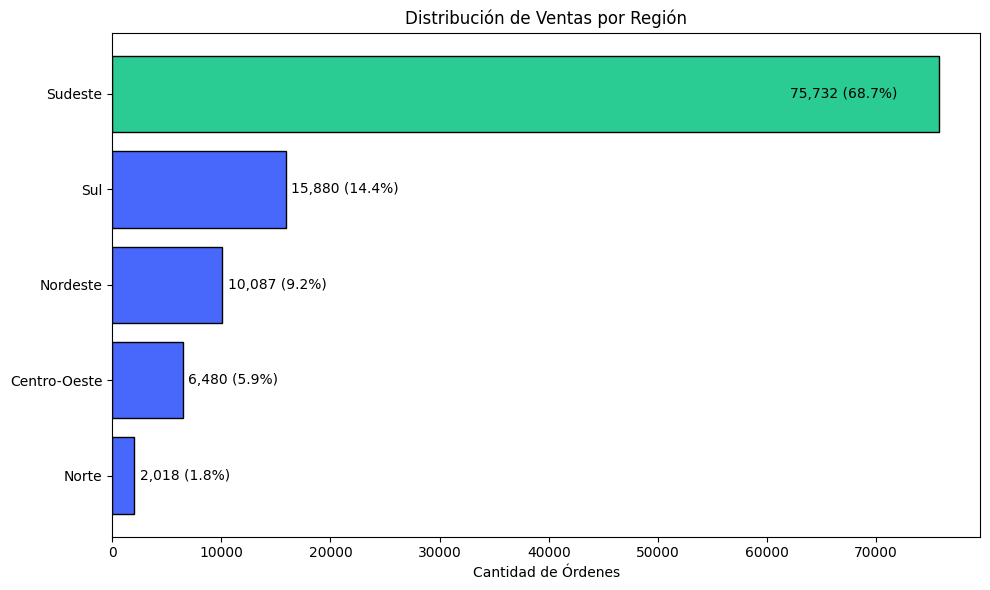

In [115]:
print("\nANÁLISIS GEOGRÁFICO")
print("-"*60)

# 1. Preparar datos
ventas_region = df['customer_region'].value_counts()
regiones = ventas_region.index[::-1]
valores = ventas_region.values[::-1]

# Identificar el top 3 para el posicionamiento del texto
top_region = ventas_region.head(1).index.tolist()

# 2. Definir colores
color_principal = '#4868fc'  # Azul
color_resaltado = '#2bcb94'  # Turquesa
colores = [color_principal if v != max(valores) else color_resaltado for v in valores]

# 3. Graficar
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(regiones, valores, color=colores, edgecolor='black')

ax.set_xlabel('Cantidad de Órdenes')
ax.set_title('Distribución de Ventas por Región')

# 4. Etiquetas dinámicas (dentro/fuera y color de fuente)
for bar, value, region in zip(bars, valores, regiones):
    pct = value / len(df) * 100
    label = f'{value:,} ({pct:.1f}%)'
    
    if region in top_region:
        # Texto DENTRO de la barra
        # Si es el máximo (turquesa), letra negra; si no (azul), letra blanca
        text_color = 'black' if value == max(valores) else 'white'
        
        ax.text(value * 0.95, bar.get_y() + bar.get_height()/2, 
                label, va='center', ha='right', 
                fontsize=10, color=text_color, fontweight='normal')
    else:
        # Texto FUERA de la barra (para regiones pequeñas)
        ax.text(value + 500, bar.get_y() + bar.get_height()/2, 
                label, va='center', ha='left', 
                fontsize=10, color='black')

plt.tight_layout()
plt.show()


REVIEW SCORE POR REGIÓN
------------------------------------------------------------


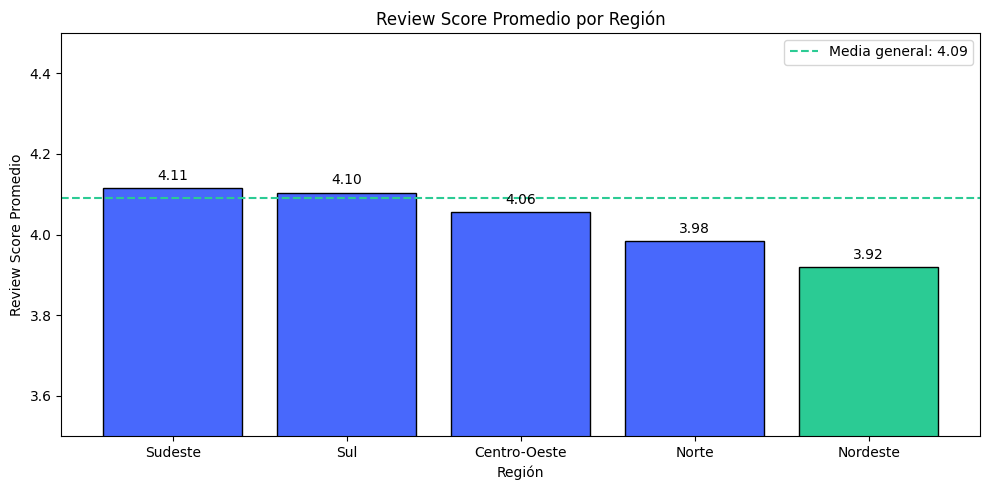

In [116]:
print("\nREVIEW SCORE POR REGIÓN")
print("-"*60)

review_region = df.groupby('customer_region')['review_score'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(review_region.index, review_region.values, color=colores, edgecolor='black')
ax.set_xlabel('Región')
ax.set_ylabel('Review Score Promedio')
ax.set_title('Review Score Promedio por Región')
ax.set_ylim(3.5, 4.5)
ax.axhline(df['review_score'].mean(), color='#2bcb94', linestyle='--', label=f'Media general: {df["review_score"].mean():.2f}')
ax.legend()

for bar, value in zip(bars, review_region.values):
    ax.text(bar.get_x() + bar.get_width()/2, value + 0.02, f'{value:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


TOP 10 ESTADOS POR VENTAS
------------------------------------------------------------


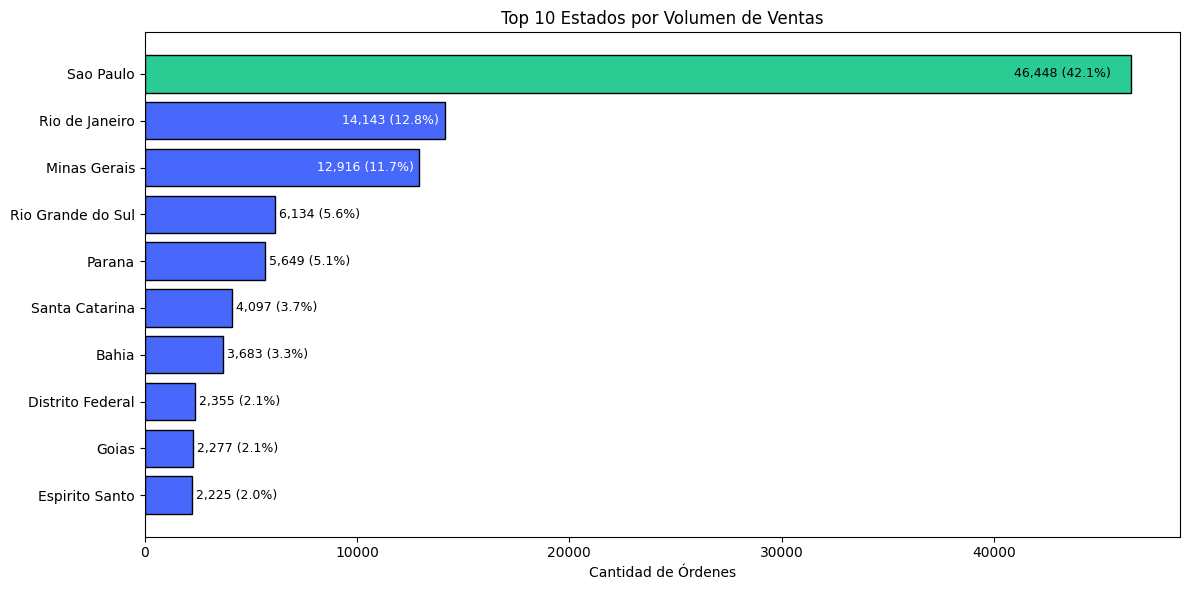


Los 3 estados principales concentran el 66.7% del negocio


In [117]:
print("\nTOP 10 ESTADOS POR VENTAS")
print("-"*60)


# 1. Obtener datos
ventas_estado = df['customer_state'].value_counts().head(10)
estados = ventas_estado.index[::-1]
valores = ventas_estado.values[::-1]

# Identificar los 3 estados con más ventas para el texto interno
top_3_estados = ventas_estado.head(3).index.tolist()

# 2. Definir colores
color_azul = '#4868fc'
color_turquesa = '#2bcb94'
colores = [color_azul if v != max(valores) else color_turquesa for v in valores]

fig, ax = plt.subplots(figsize=(12, 6))

# 3. Dibujar barras
bars = ax.barh(estados, valores, color=colores, edgecolor='black')

ax.set_xlabel('Cantidad de Órdenes')
ax.set_title('Top 10 Estados por Volumen de Ventas')

# 4. Añadir etiquetas dinámicas
for bar, value, estado in zip(bars, valores, estados):
    pct = value / len(df) * 100
    label = f'{value:,} ({pct:.1f}%)'
    
    if estado in top_3_estados:
        # Texto DENTRO de la barra
        # Negro si es la barra turquesa (máximo), blanco si es azul
        text_color = 'black' if value == max(valores) else 'white'
        ax.text(value * 0.98, bar.get_y() + bar.get_height()/2, 
                label, va='center', ha='right', 
                fontsize=9, color=text_color)
    else:
        # Texto FUERA de la barra
        ax.text(value + 200, bar.get_y() + bar.get_height()/2, 
                label, va='center', ha='left', 
                fontsize=9, color='black')

plt.tight_layout()
plt.show()

top3_pct = ventas_estado.head(3).sum() / len(df) * 100
print(f"\nLos 3 estados principales concentran el {top3_pct:.1f}% del negocio")


 ANÁLISIS DE PATRONES DE COMPRA


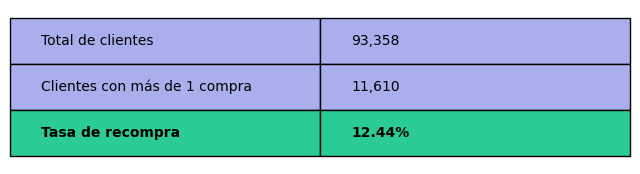

In [118]:
print("\n ANÁLISIS DE PATRONES DE COMPRA")
print("="*60)

productos_por_cliente = df.groupby('customer_unique_id')['product_category_name'].apply(list)

clientes_recurrentes = productos_por_cliente[productos_por_cliente.apply(len) > 1]

# Datos calculados previamente
total_clientes = df['customer_unique_id'].nunique()
recurrentes = len(clientes_recurrentes)
tasa_recompra = (recurrentes / total_clientes) * 100

# Preparación de los datos para la tabla
datos = [
    ["Total de clientes", f"{total_clientes:,}"],
    ["Clientes con más de 1 compra", f"{recurrentes:,}"],
    ["Tasa de recompra", f"{tasa_recompra:.2f}%"]
]

# Configuración de la figura
fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('tight')
ax.axis('off')

# Creación de la tabla
tabla = ax.table(cellText=datos, loc='center', cellLoc='left')

# Estilización de celdas
colores_filas = ['#a9aeed', '#a9aeed', '#2bcb94']

for i in range(len(datos)):
    for j in range(2): # Columnas 0 y 1
        cell = tabla[i, j]
        cell.set_facecolor(colores_filas[i])
        cell.set_text_props(color='black', fontweight='bold' if i == 2 else 'normal')
        cell.set_edgecolor('black')
        cell.set_height(0.3)

# Ajustar diseño y guardar
plt.show()

In [119]:
print("\n CATEGORÍAS POPULARES POR REGIÓN")
print("="*60)

for region in df['customer_region'].unique():
    top_cat = df[df['customer_region'] == region]['product_category_name'].value_counts().head(3)
    print(f"\n{region}:")
    for i, (cat, count) in enumerate(top_cat.items(), 1):
        print(f"   {i}. {cat} ({count:,})")


 CATEGORÍAS POPULARES POR REGIÓN

Sudeste:
   1. cama_mesa_banho (8,307)
   2. beleza_saude (6,380)
   3. esporte_lazer (5,709)

Nordeste:
   1. beleza_saude (1,109)
   2. relogios_presentes (766)
   3. esporte_lazer (733)

Centro-Oeste:
   1. beleza_saude (622)
   2. cama_mesa_banho (571)
   3. esporte_lazer (528)

Sul:
   1. moveis_decoracao (1,418)
   2. cama_mesa_banho (1,400)
   3. esporte_lazer (1,300)

Norte:
   1. beleza_saude (209)
   2. informatica_acessorios (165)
   3. esporte_lazer (161)


In [120]:
correlacion = df['price'].corr(df['review_score'])

In [121]:
print("\n" + "="*70)
print("📊 RESUMEN DE INSIGHTS PARA EL SISTEMA DE RECOMENDACIÓN")
print("="*70)

print("\n PATRONES DE COMPRA:")
print(f"   • {df['product_category_name'].nunique()} categorías de productos")
print(f"   • Categoría más popular: {df['product_category_name'].value_counts().index[0]}")
print(f"   • Tasa de recompra: {len(clientes_recurrentes) / df['customer_unique_id'].nunique() * 100:.2f}%")

print("\n SATISFACCIÓN:")
print(f"   • Review promedio: {df['review_score'].mean():.2f}/5")
print(f"   • {(df['review_score'] >= 4).sum()/len(df)*100:.1f}% de reviews positivas")
print(f"   • Correlación precio-satisfacción: {correlacion:.3f} (débil)")

print("\n GEOGRAFÍA:")
print(f"   • Región dominante: Sudeste ({(df['customer_region'] == 'Sudeste').sum()/len(df)*100:.1f}%)")
print(f"   • Estado líder: {df['customer_state'].value_counts().index[0]}")

print("\n TEMPORALIDAD:")
print(f"   • Período de datos: {df['order_date'].min().strftime('%Y-%m')} a {df['order_date'].max().strftime('%Y-%m')}")
print(f"   • Día más activo: {ventas_dia.idxmax()}")

print("\n PAGOS:")
print(f"   • Método preferido: {df['payment_type'].value_counts().index[0]} ({df['payment_type'].value_counts().iloc[0]/len(df)*100:.1f}%)")


📊 RESUMEN DE INSIGHTS PARA EL SISTEMA DE RECOMENDACIÓN

 PATRONES DE COMPRA:
   • 74 categorías de productos
   • Categoría más popular: cama_mesa_banho
   • Tasa de recompra: 12.44%

 SATISFACCIÓN:
   • Review promedio: 4.09/5
   • 77.0% de reviews positivas
   • Correlación precio-satisfacción: 0.003 (débil)

 GEOGRAFÍA:
   • Región dominante: Sudeste (68.7%)
   • Estado líder: Sao Paulo

 TEMPORALIDAD:
   • Período de datos: 2016-09 a 2018-08
   • Día más activo: Monday

 PAGOS:
   • Método preferido: credit_card (76.4%)


In [122]:
columnas_modelo = [
    'order_number',
    'order_id',
    'product_id',
    'price',
    'product_category_name',
    'order_purchase_datetime',
    'customer_unique_id',
    'customer_state',
    'customer_region',
    'review_score',
    'payment_type'
]

df_final = df[columnas_modelo].copy()

print("DATASET FINAL PARA MODELO")
print("="*60)
print(f"Dimensiones: {df_final.shape[0]:,} filas × {df_final.shape[1]} columnas")
print(f"\nColumnas:")
for i, col in enumerate(df_final.columns, 1):
    print(f"   {i:2d}. {col}")

DATASET FINAL PARA MODELO
Dimensiones: 110,197 filas × 11 columnas

Columnas:
    1. order_number
    2. order_id
    3. product_id
    4. price
    5. product_category_name
    6. order_purchase_datetime
    7. customer_unique_id
    8. customer_state
    9. customer_region
   10. review_score
   11. payment_type


In [123]:
output_file = 'olist_clean_for_model.csv'
df_final.to_csv(output_file, index=False)